<img style="float: left;margin:0 10px 10px 0" src="DSS_logo2.png" width=80>

#  Introduction to Python: Workshop 3

#### Content created by Francesca Pontin [francescapontin.com](http://francescapontin.com/teaching_materials.html)

This workshop will let you get started with mapping data in Python and introduce you to downloading data from github and runnign a Jupyter Notebook from the Anaconda prompt. <br>
We will cover:
- Downloading data from Github
- Installing packages from the Anaconda prompt
- Opening Jupyter notebook from the Anaconda promt
- Reading in spatial data
- Understanding the geometry column
- Coordinate reference systems
- Plotting maps (choropleth, point data, categorical data & multiple map layers)
- Subplots
- Subsetting and  aggreagting spatial data
- Spatial and non-spatially joining data

Feel free to use your own laptops today if you have them with you 

# Part 1: Downloading data from Github

Either access the data through github via the [website link](http://francescapontin.com/teaching_materials.html) or directly via [Github](https://github.com/FrancescaPontin/Intro_to_Python_3).  You should see something similar to this:

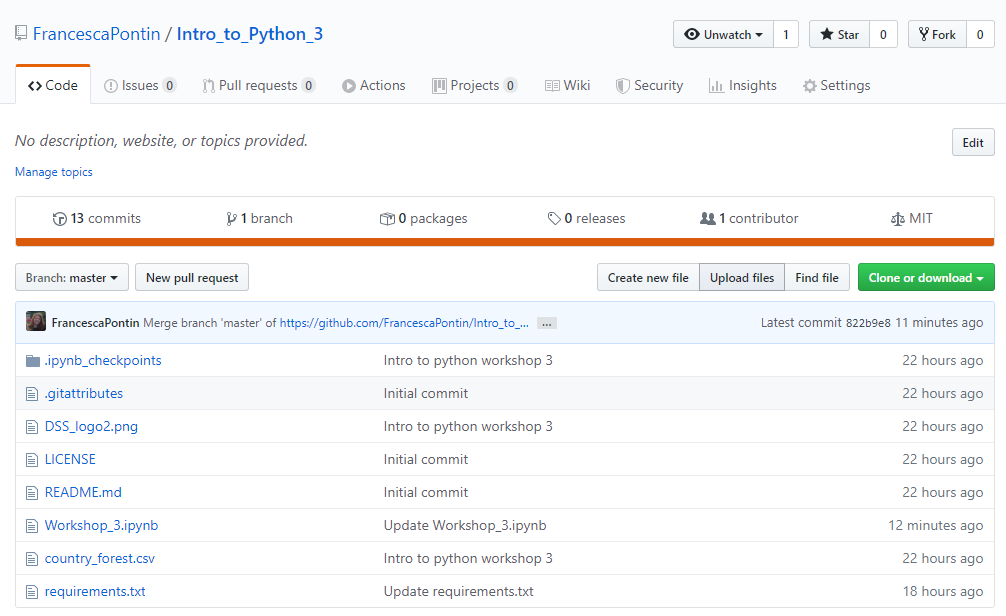

Click "Clone or download" > "Download ZIP". 
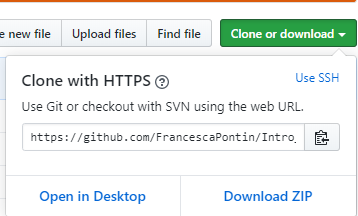

### Saving the files
Save the zip file in your documents and then right click and extract files. Save your files in your M drive (the one with your user name) or you may not be abel to access them again once you change computer. 

# Part 2: Running a Jupyter Notebook

Previously we have been accessing the practicals via a website version of a Jupyter Notebook (it looks and behaves the same). Today we will be running the Jupyter Notebook from the Anaconda Prompt.<br>
First open the anaconda prompt by searching for it in your programs.
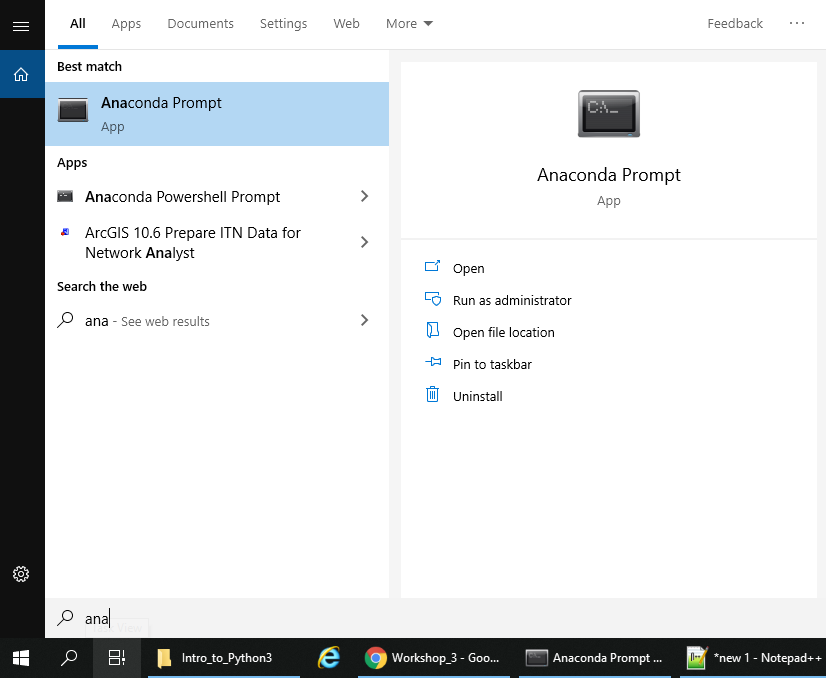

It should open and look like this:
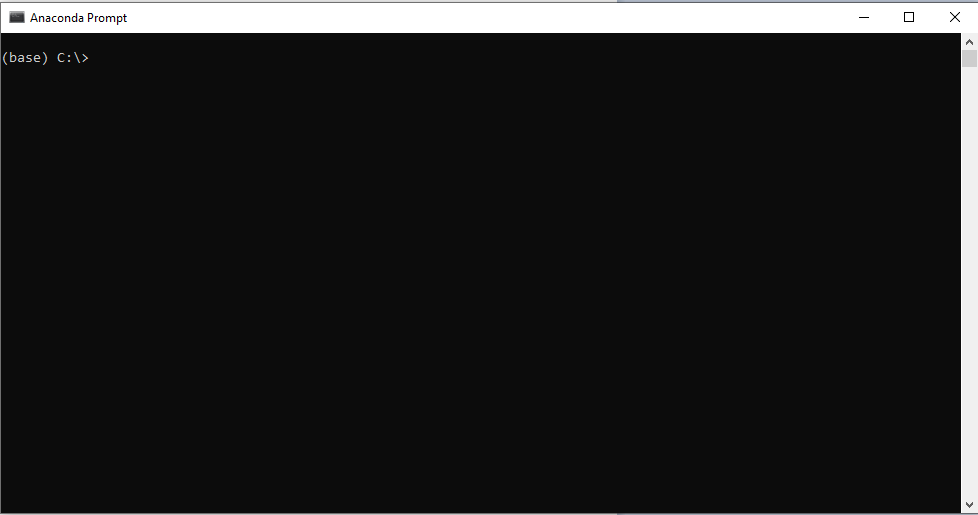

Now type <code>conda install geopandas</code> be careful with spelling and letter case
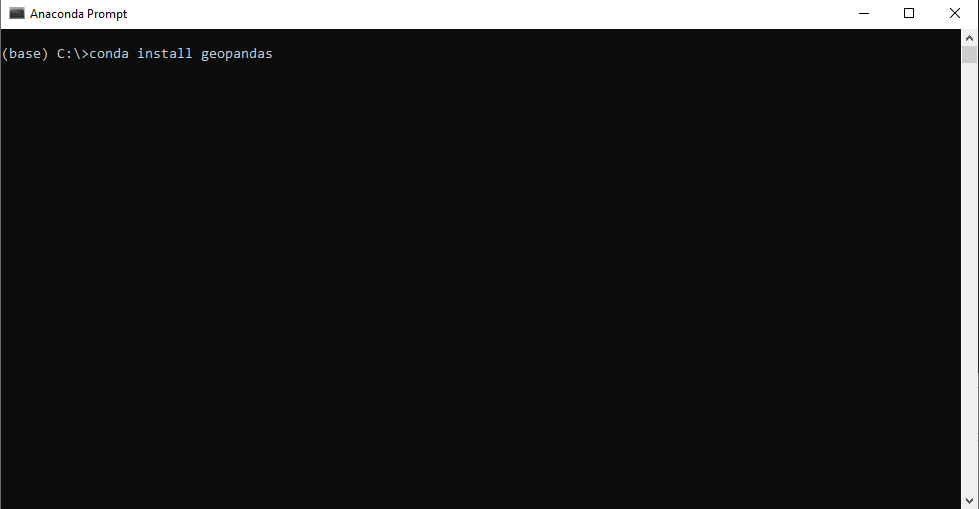

It may then ask you if you want to install other packages, just type <code>y</code> for yes. The package may take some time to load.

Once it has loaded the <code>(base) C:\> </code> will appear. You have installed your first package!!
Type <code>jupyter notebook</code> and the jupyter notebook should appear in your internet browser. 
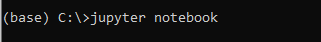
<br> (Note the internet is not required to run the notebook). <br>
It should look familiar to you from the previous workshops. Navigate to your downloaded files and open "Workshop_3.ipynb".


# Part 3: Mapping Data

Once again at the begining we import the required packages <br>
If you get an error message at this stage call one of use over as we may need to install more packages <br>
<font color='orchid'> <b>Import the packages below </font>

In [1]:
#Import the required packages
import pysal
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import pyproj

We have imported a new package (that we just installed) geopandas. Geopandas works like pandas but also handles spatial data. Geopandas was designed to allow people to easily handle and use spatial datasets in Python. <br>

Geopandas has some datasets built into the package. We are going to use these datasets to get started and make some maps.

<font color='orchid'> <b>Run the code below to explore which datasets are built in to the geopandas package </font>

In [2]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Geopandas has three in built datasets. We are going to use 'naturalearth_cities' and 'naturalearth_lowres'. <br>
To use the datasets we need to read them in from where they are stored in the geopandas package file directory. <br>
We will use the print function to check we have got the correct file path.<br>
<font color= 'orchid'> <b>Run the code bellow to get the file paths for the datasets </font>

In [3]:
cities_path = geopandas.datasets.get_path('naturalearth_cities')
countries_path = geopandas.datasets.get_path('naturalearth_lowres')
print(cities_path)
print(countries_path)

C:\Users\franc\Anaconda3\lib\site-packages\geopandas\datasets\naturalearth_cities\naturalearth_cities.shp
C:\Users\franc\Anaconda3\lib\site-packages\geopandas\datasets\naturalearth_lowres\naturalearth_lowres.shp


### Shapefiles
Notice the file type of the 'naturalearth_cities' and 'naturalearth_lowres' is ".shp". This is a shapefile ["A shapefile is an Esri vector data storage format for storing the location, shape, and attributes of geographic features. It is stored as a set of related files and contains one feature class."](https://doc.arcgis.com/en/arcgis-online/reference/shapefiles.htm).

### Reading in spatial data
We need to read these shp files in, geopandas work the same way as pandas, but are also able to handle the spatial element of the dataset. Therefore the code we use is very similar. We use <code>geopandas.real_file(<font color =red>file_path</font>) </code> replacing <font color =red>"file_path"</font>, with the actual path to the shapefile you want to use.

<div class="alert alert-block alert-info">
<b>Note:</b> This is very similar to the <code>pd.read_csv() function</code>
</div>

<font color='orchid'> Run the code below to read the spatial data in </font>

In [4]:
# Read in the shape file data
cities = geopandas.read_file(cities_path)
countries = geopandas.read_file(countries_path)

### Data Exploration
Just as we have done before we are goign to explore the data by having a look at the dataframes and by visualising both the data sets.

In [5]:
# let's have a look at the cities geopandas dataframe 
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


Note that the dataframe has two columns:
- 'name' naming the city
- 'geometry' listing the type of geometry, in this case POINT. And two numbers - the coordiantes of the point.

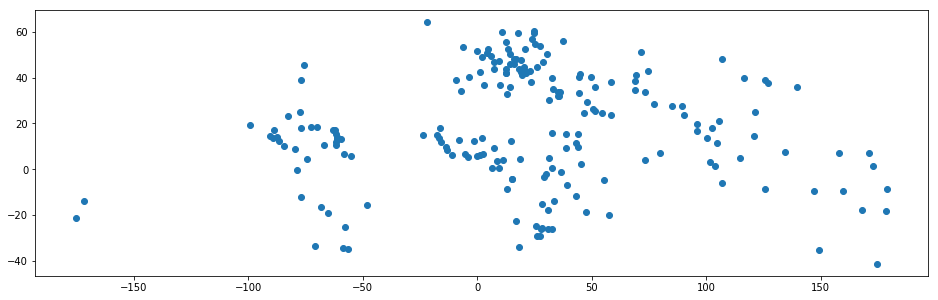

In [6]:
# Plot the cities data

# define the plot size and nummber of subplots (1 i.e. 1 plot)
f, ax = plt.subplots(1, figsize=(16, 8))
# plot the  cities, specifying the subplot axis
cities.plot(ax=ax)
# show the plot
plt.show()

Now we will do the same for the countries dataframe.

In [7]:
# Explore the countries dataframe
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


<b>Note</b> the geometry column this time is made up of POLYGON data, made up of many coordiante points. <br>
Let us have a closer look at the polygon geometry. We are going to look at the geometry of row 1 which happens to be Afghanistan.

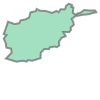

In [8]:
# Lets look at row 1 (Afghanistan) of the geometry column
# Notice the shape is quite complex with lots of edges
countries.loc[0,'geometry']

In [9]:
# let us look at the list of coordiantes
print(countries.loc[0,'geometry'])
# Each point is a corner of the country

POLYGON ((61.21081709172574 35.65007233330923, 62.23065148300589 35.27066396742229, 62.98466230657661 35.40404083916762, 63.19353844590035 35.85716563571891, 63.98289594915871 36.0079574651466, 64.5464791197339 36.31207326918427, 64.74610517767741 37.1118177353333, 65.58894778835784 37.30521678318564, 65.74563073106683 37.66116404881207, 66.21738488145934 37.39379018813392, 66.51860680528867 37.36278432875879, 67.07578209825962 37.35614390720929, 67.82999962755952 37.14499400486469, 68.13556237170138 37.02311513930431, 68.85944583524594 37.3443358424306, 69.19627282092438 37.15114350030743, 69.51878543485796 37.60899669041342, 70.11657840361033 37.58822276463209, 70.27057417184014 37.73516469985402, 70.3763041523093 38.13839590102752, 70.80682050973289 38.48628164321642, 71.34813113799026 38.25890534113216, 71.23940392444817 37.95326508234189, 71.54191775908478 37.90577444106565, 71.44869347523024 37.06564484308052, 71.84463829945059 36.73817129164692, 72.1930408059624 36.9482876653456

### Now let's plot the countries

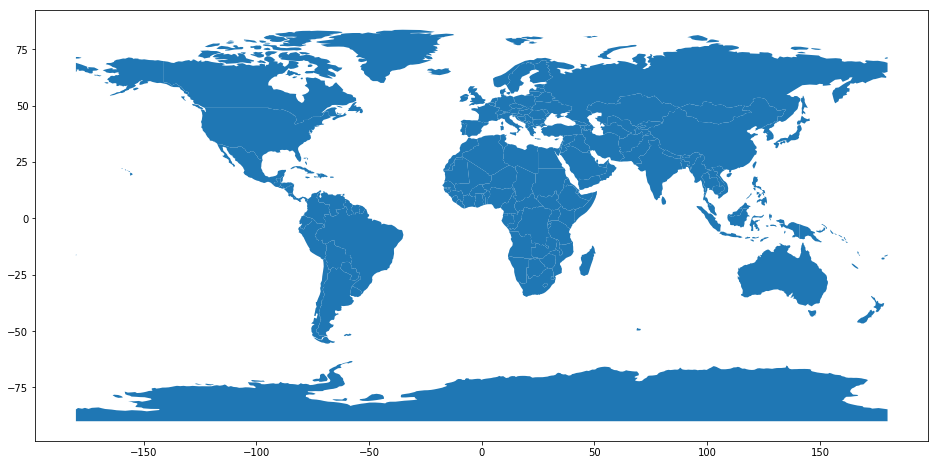

In [10]:
f,ax = plt.subplots(1, figsize=(16, 8))
countries.plot(ax=ax)
plt.show()

### Layering maps
Much like other mapping software it is possible to layer maps in Python. We will plot the cities on top of the countires dataset.

### Coordinate
Before we map multiple layers we need to check they have the same Coordinate Refernce System (CRS). Using the <code>.crs</code> function

In [11]:
cities.crs

{'init': 'epsg:4326'}

Look at what happens when we change the projection

In [12]:
countries_copy= countries.to_crs(epsg=3040)

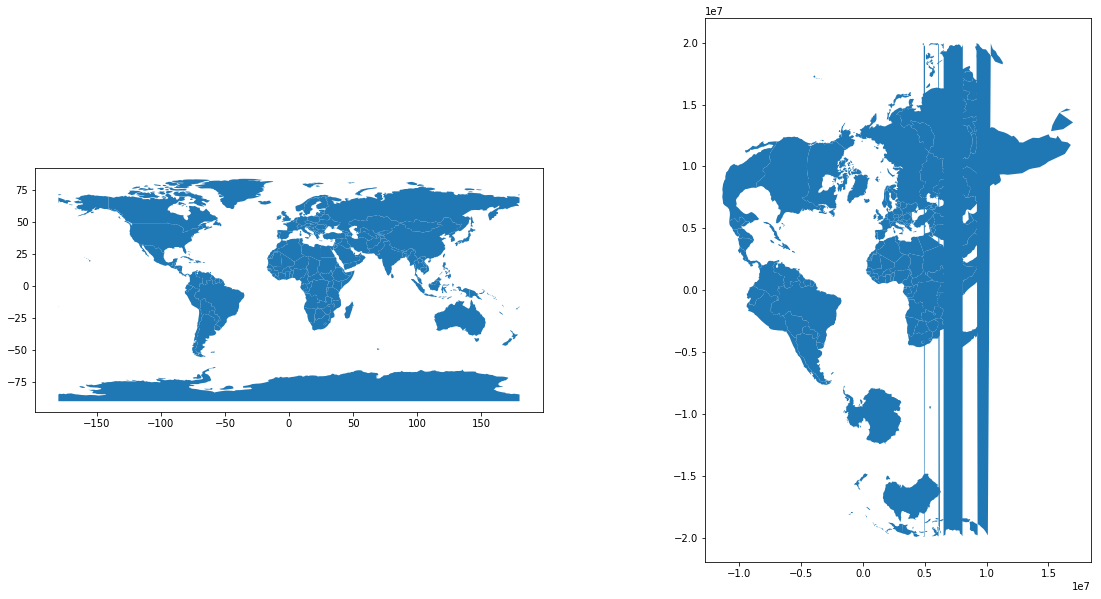

In [13]:
# plot the two diifferent projections
f, ax = plt.subplots(1,2, figsize=(20, 10))
countries.plot(ax=ax[0])
countries_copy.plot(ax=ax[1])
plt.show()
# Note the different scales on the axis and orrientation of the countries

In [14]:
# Check the CRS are the same
print(cities.crs, countries.crs)

{'init': 'epsg:4326'} {'init': 'epsg:4326'}


The CRS of both datasets is the same so we can plot them on top of each other

### Plot the cities and countries together

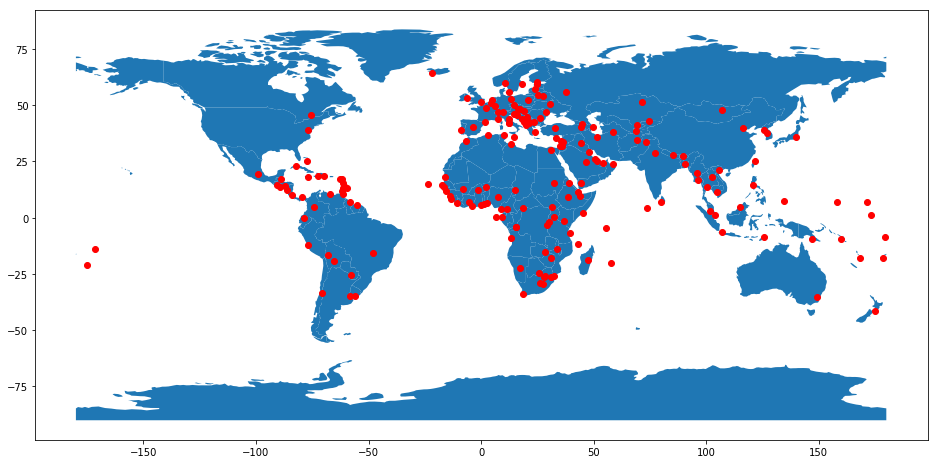

In [15]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# shw the map
plt.show()

## Choropleth Mapping
Choropleth maps are maps where the polygons are coloured differenet shades or colours based on a value. E.g. Populaiton

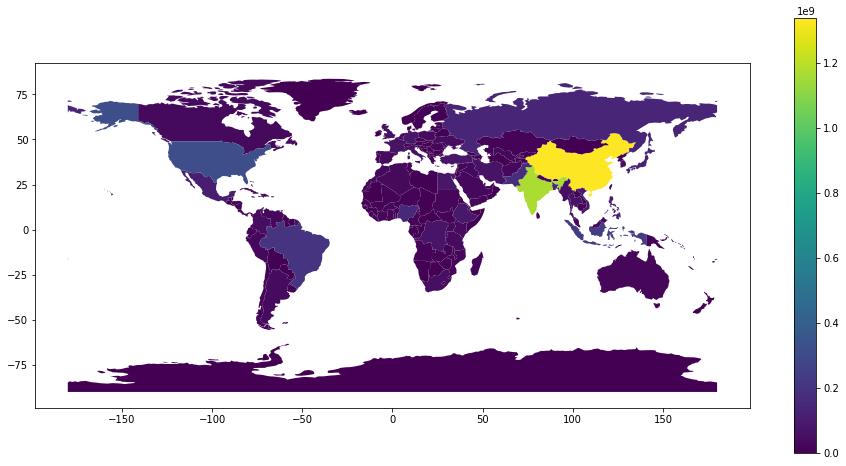

In [16]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend
countries.plot(ax=ax, column ='pop_est', legend=True)
plt.show()

<font color= 'orchid'> <b>Code your own choropleth map for 'gpd_mp_est'<b></font><br>
    Answer at the end of the workbook

In [17]:
# code your choropleth map here!

### Plotting Categorical variables
It is possible to create choropleth maps with categorical variables. To do this we specify <code> categorical=True,</code> withn the <code>plot()</code> function.<br> If we treat the continent of the country as a categorical variable we can colour the countries based on the continent they are in.<br>

<font color ='orchid'> <b> Run the code below to plot a categorical choropleth </font>

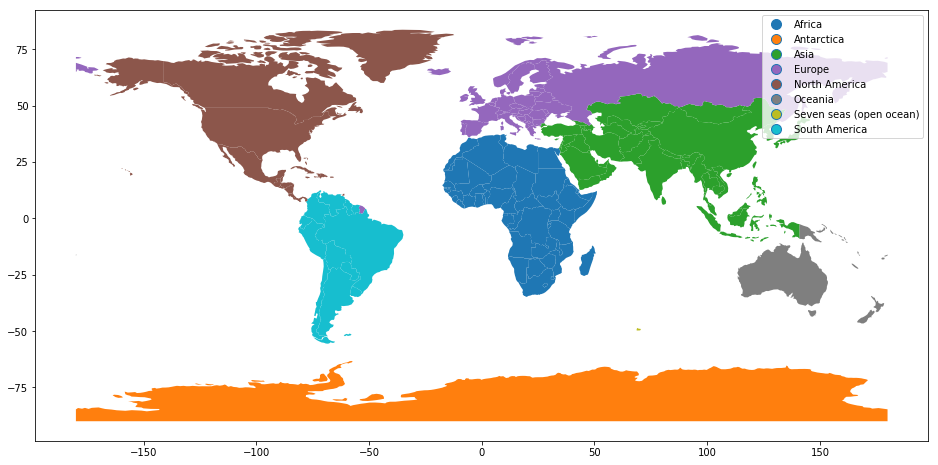

In [18]:
f,ax = plt.subplots(1, figsize=(16,8))
countries.plot(ax=ax, column ='continent', categorical=True, legend=True)
plt.show();

## Subsetting spatial data
We can also work with and plot just a subset of the spatial data. For example we might only be interested in Africa. In which case we can use the <code>.loc[]</code> fucntion to locate all rows (countries) where the continent is Africe. Just like we would normally do in a non-spatial pandas dataframe.<br>

<font color ='orchid'> <b>Run the code below </font>

In [19]:
# locate countries (rows) in Africa
africa= countries.loc[countries['continent']=='Africa']
# view the newly created Africa dataframe
africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
11,8988091.0,Africa,Burundi,BDI,3102.0,POLYGON ((29.33999759290035 -4.499983412294092...
13,8791832.0,Africa,Benin,BEN,12830.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
14,15746232.0,Africa,Burkina Faso,BFA,17820.0,POLYGON ((-2.827496303712707 9.642460842319778...
25,1990876.0,Africa,Botswana,BWA,27060.0,POLYGON ((25.64916344575016 -18.53602589281899...
26,4511488.0,Africa,Central African Rep.,CAF,3198.0,"POLYGON ((15.27946048346911 7.421924546737969,..."
31,20617068.0,Africa,Côte d'Ivoire,CIV,33850.0,POLYGON ((-2.856125047202397 4.994475816259509...
32,18879301.0,Africa,Cameroon,CMR,42750.0,"POLYGON ((13.07582238124675 2.267097072759015,..."
33,68692542.0,Africa,Dem. Rep. Congo,COD,20640.0,"POLYGON ((30.83385989759381 3.509165961110341,..."
34,4012809.0,Africa,Congo,COG,15350.0,POLYGON ((12.99551720546518 -4.781103203961884...


It is now possible to plot just Africa. We can also put maps side by side to compare them. Here we are going to plot population estimate for each country and the estimated GDP for each country.<br>

<font color = 'orchid'> <b> Run the code below,</b> make sure you understand what each line does (there is a lot going on)</font>

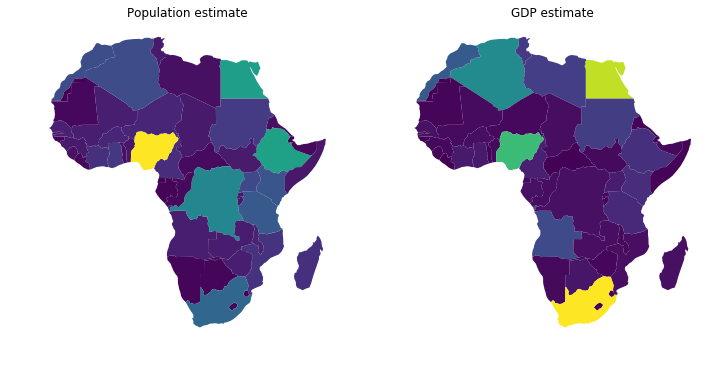

In [20]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(1,2, figsize=(12,6))

# plot population estimate in subplot 1
africa.plot(ax=ax[0], column ='pop_est')

# plot gdp estimate in subplot 2
africa.plot(ax=ax[1], column ='gdp_md_est')

# give subplot 1 an informative title
ax[0].set_title('Population estimate')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()

# show figure
plt.show()

## Subplots and axes

A quick note on the subplot and ax indexing. It can be a little tricky getting your head arround the indexing used when creating subplots.
To create mulitple subplots you use the code below, specifying firstly the number of rows then the number of columns. <br>
<code>.subplots([number of rows], [number of columns])</code>

When you are then specifyng each individual plot, you need to specify the axes of the plot, using the code <code> ax=ax[]</code>. The indexing for the axes starts at 0. I.e. the first row is 'row 0' and the first column, 'column 0'. This is illustrated below. 
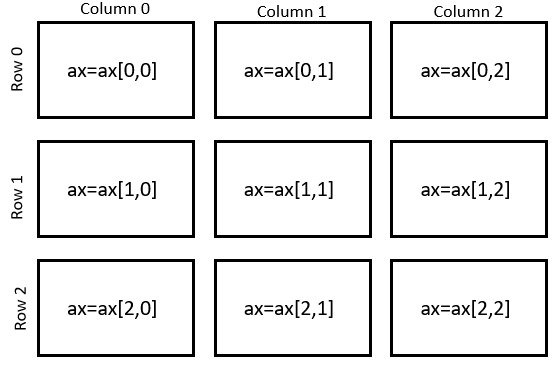

For a set of subplots with just one row you only need to specify the column in the <code>ax=ax[]</code> function. <br>
I.e. <code>ax=ax[column number]</code> <br>

I.e.<code> plt.subplot(1,2) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
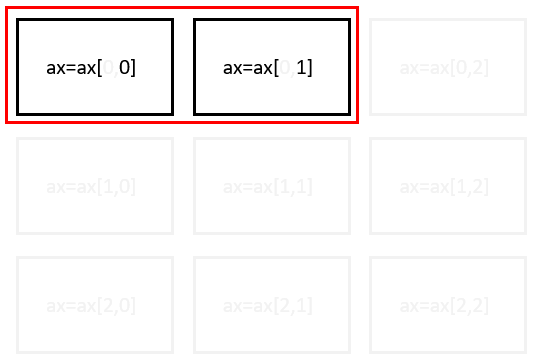 

Simialrly for a set of subplots with just one column you only need to specify the row in the <code>ax=ax[]</code> function. <br>
<code> plt.subplot(2,1) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
</code>
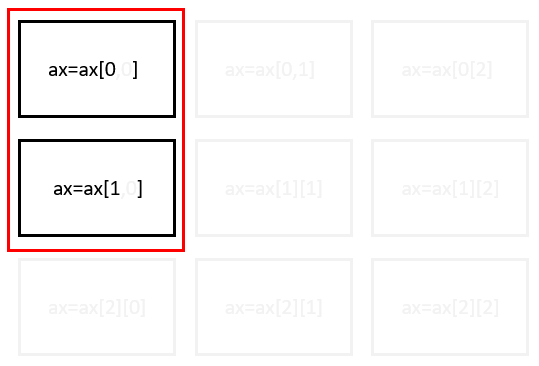

For a set of subplots with just multiple rows and columns you only need to specify both in the <code>ax=ax[,]</code> funciton.(row first then column)<br>
<code>plt.subplot(2,3)<br>
dataframe.plot(ax=ax[0,0], ... 
dataframe.plot(ax=ax[0,1], ...
dataframe.plot(ax=ax[0,2], ...
dataframe.plot(ax=ax[1,0], ...
dataframe.plot(ax=ax[1,1], ...
dataframe.plot(ax=ax[1,2], ...</code>
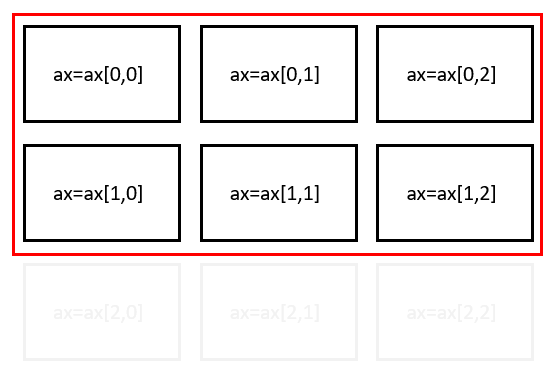

## Spatially aggregating data
Often our data will not be at the same spatial scale so we may need to aggreaget areas of data together to get them to the same spatial scale. Or we may only be interested in larger spatial trends. Therefore we need to convert our smaller area data to larger area data. In geopandas we can easily so this using the <code>dissolve</code> function. 
In this example we are going to aggregate countries up to continent level. <br>
Think of dissolve as removing all the internal country boarders within the continent to leave just the continent outline.<br>
The data for the continent also gets aggregated e.g. estimated populaitn and GDP. <br>
<font color='orchid'> <b> Run the code below </font>

In [21]:
# specify which columns from the countries dataframe we are going to aggreagate,
# use the continent column to inform the dissolve
continents = countries[['continent', 'pop_est', 'geometry','gdp_md_est']].dissolve(by='continent')

# view the new continents dataframe
continents

,geometry,pop_est,gdp_md_est
continent,,,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...,12799293.0,110300.0
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...,3802.0,760.4
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...,28400000.0,22270.0
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...,3639453.0,21810.0
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1...",309156.0,9093.0
Oceania,(POLYGON ((173.0203747907408 -40.9190524228564...,21262641.0,800200.0
Seven seas (open ocean),"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",140.0,16.0
South America,(POLYGON ((-68.63401022758316 -52.636370458874...,40913584.0,573900.0


<font color= 'orchid'><b>Run the code below to plot a choropleth map of popualtion estimates for the continents</font>

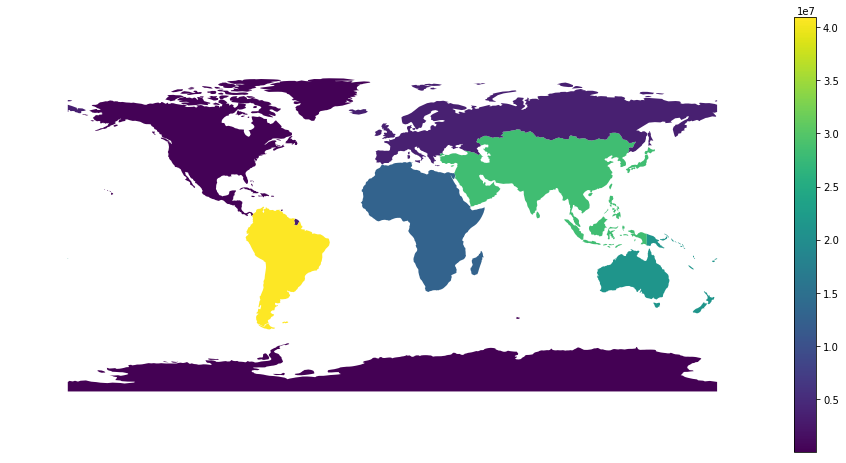

In [22]:
f,ax = plt.subplots(1, figsize=(16,8))
continents.plot(column='pop_est',legend=True, ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

<font color='orchid'> <b>Try plotting continents by 'gdp_md_est' </font> <br>
Answer at the end

In [23]:
#  plot here!

## Joining a non-spatial dataset to a spatial dataset

We are going to read in some data about forest coverage of differenet countires and join it to the countires dataframe

<font color ='orchid'><b> Run the code below to read in a csv of country forest coverage data </font>

In [24]:
# read in csv data using pandas
forest = pd.read_csv('country_forest.csv')
# have a quick look at the dataframe
forest.head()

,country,forest_area_km2,per_forest
0,Russia,8149300,0.4940
1,Canada,4916438,0.4924
2,Brazil,4776980,0.5610
3,United States,3100950,0.3384
4,China,2083210,0.2183


The 'country' column in the forest dataframe matches that of the 'name' column in the countries dataframe. As they are formatted in exaclty the same way and each row is unique the country name is a unqiue identifier common to both dataframes. Therefore we will use this column to join our datasets. <br>
The code we will use is <code>pd.merge()</code>. We need to specify a few parameteres within the function:<br>

- Firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code> pd.merge(countries, forest... </code> <br>


- Secondly we need to specify the column in each dataframe, countries is on the left so we specify left_on='name': as we are using the 'name' column from the countires dataframe. And the forest dataframe is on the right so we specify right_on='country' as we are using the 'country' column.<br>
<code> pd.merge(countries, forest, left_on='name', right_on='country' ... </code> <br>


- Finally we need to specify how the tables are joined. This is based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/). In this case we are using a left join (we keep all the data in the left dataframe and just add the columns form the right dataframe on the end). 
<code> pd.merge(countries, forest, left_on='name', right_on='country', how='left') </code> <br>

In [25]:
country_forest  = pd.merge(countries, forest,  left_on='name', right_on='country', how='left')
country_forest.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,forest_area_km2,per_forest
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,1631.0,0.0025
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola,591040.0,0.4741
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania,7716.0,0.2684
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates,3120.0,0.0373
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina,945336.0,0.3400


Now we will visualise our newly joined data by plotting the percentage forest in each country

C:\Users\franc\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


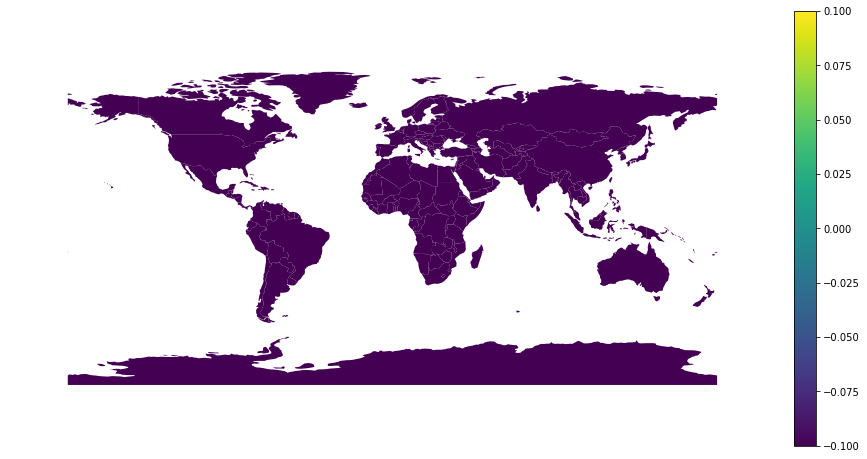

In [26]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

Because thereis such a large variaiton in percentage tree cover the above map with a continuous scale doesn't tell us much. To make a more informative plot we can use <code> scheme = ' '</code> 
And use <code> ['equal_interval', 'quantiles', 'fisher_jenks', 'fisher_jenks_sampled']</code> to define how the choropleth map is scaled.

C:\Users\franc\Anaconda3\lib\site-packages\mapclassify\classifiers.py:276: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
C:\Users\franc\Anaconda3\lib\site-packages\mapclassify\classifiers.py:276: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
C:\Users\franc\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


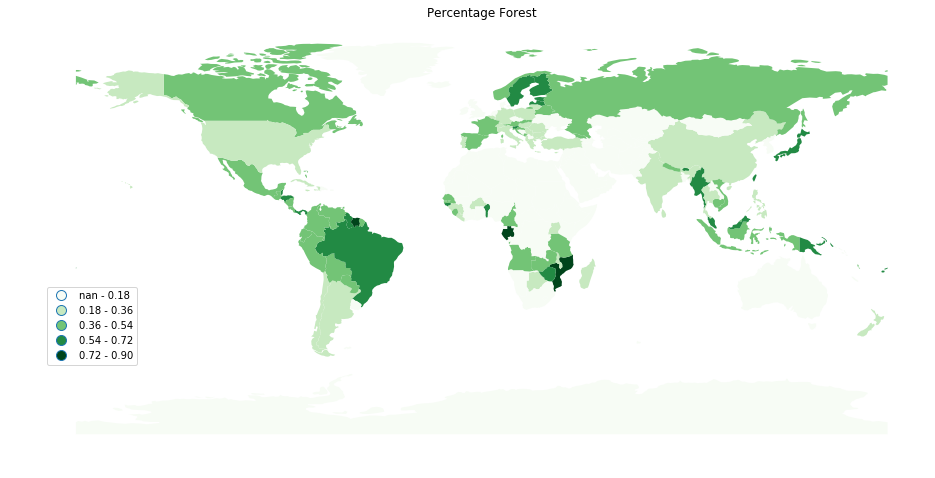

In [27]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,cmap='Greens',scheme='equal_interval', ax=ax)
# remove axis
ax.set_axis_off()
# position axis
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_title('Percentage Forest')
plt.show();

<font color='orchid'><b> Write your own code to map 'forest_area_km2'</font> <br>
Answer at the end

In [28]:
# plot here!


## Spatially Joining Data

It is also possible to join data based on their spatial realtionship to each other using <code>.sjoin()</code>
For example we ight want to know the country each city is in.


Like with <code>pd.merge()</code> there are parameters we need to spcify when using <code>geopandas.sjoin()</code>

- Again firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code>geopandas.sjoin(cities, countries, ... </code> <br>


- Secondly we need to specify how the tables are joined. (Again based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/)). In this case we are using an inner join
<code> geopandas.sjoin(cities, countries, how="inner",... </code> <br>

- Finally we need to specify the tyep of spatial join using 'op'. From the [Geopandas documentation](http://geopandas.org/mergingdata.html) <br>
<i>The `op argument specifies how geopandas decides whether or not to join the attributes of one object to another. There are three different join options as follows:
    - <b>intersects:</b> The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.
    - <b>within:</b> The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).
    - <b>contains:</b> The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all. </i> <br>
    
<font color = 'orchid'><b> Run the code belwo to spatially join the data </font>

In [29]:
cities_with_country = geopandas.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79,58126212.0,Europe,Italy,ITA,1823000.0
1,San Marino,POINT (12.44177015780014 43.936095834768),79,58126212.0,Europe,Italy,ITA,1823000.0
192,Rome,POINT (12.481312562874 41.89790148509894),79,58126212.0,Europe,Italy,ITA,1823000.0
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9,8210281.0,Europe,Austria,AUT,329500.0
184,Vienna,POINT (16.36469309674374 48.20196113681686),9,8210281.0,Europe,Austria,AUT,329500.0


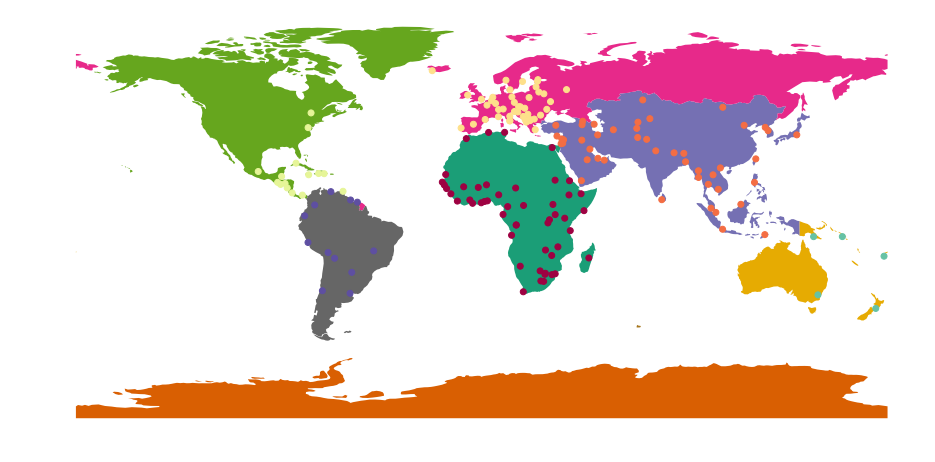

In [30]:
# let us plot the cities now coloured by the continent (a column initally from the cities dataframe)
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, cmap='Dark2')
# plot the cities and colour them based on continent
cities_with_country.plot(column='continent',ax=base, cmap='Spectral')
# remove axis
ax.set_axis_off()
plt.show()

<img style="float: left;margin:0 10px 10px 0" src="DSS_logo2.png" width=80>
<img style="float: right;margin:0 10px 10px 0" src="DSS_logo2.png" width=80>
<H1><center>  <font color = 'slateblue'>CONGRATULATIONS!!!</h1></center>
   
<h2><center>   <font color = 'skyblue'>YOU HAVE REACHED THE END OF  WORKSHOP 3 <br>&<br> COMPLETED THE INTRODUCTION TO PYTHON WORKSHOP SERIES </h2></center>


![GIFUrl](https://media1.tenor.com/images/00efa8c07f5a8b537b045544b6782e70/tenor.gif?itemid=4180838https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "celebrate")

# Answers

#### Choropleth map of countires by 'gpd_mp_est'

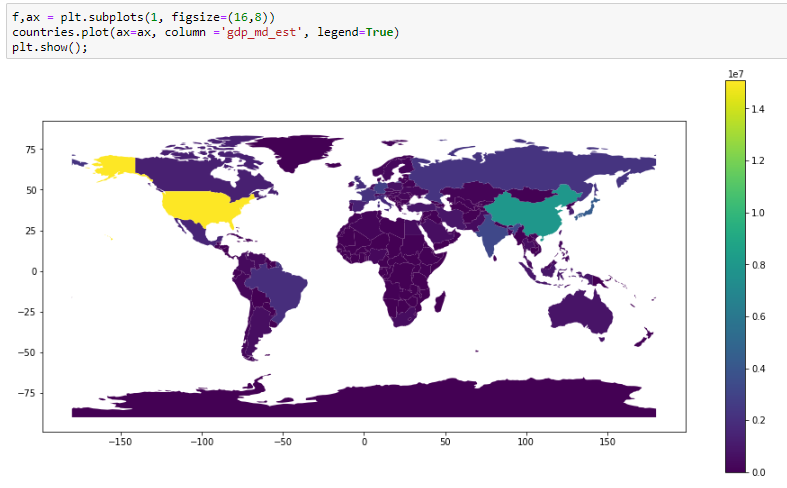

#### Choropleth map of continents by 'gpd_mp_est'

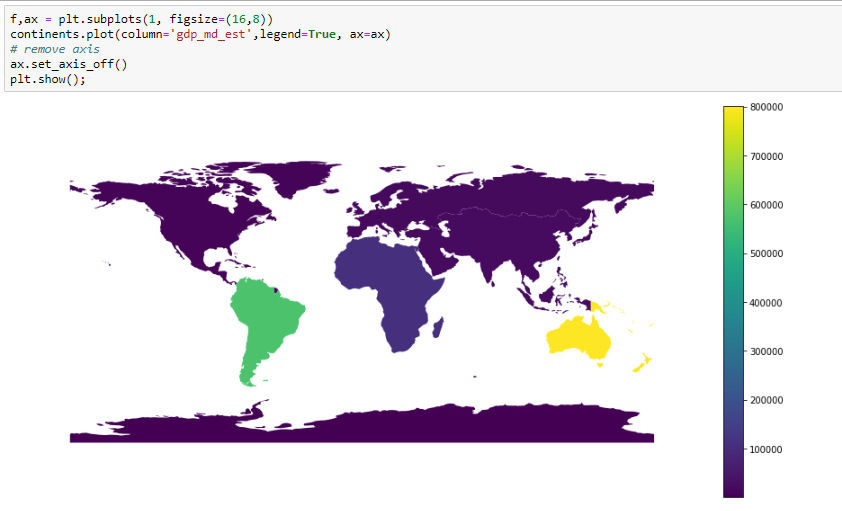

#### Map 'forest_area_km2'
(Note I have used the quantiles scheme but other shcemes are also appropriate)

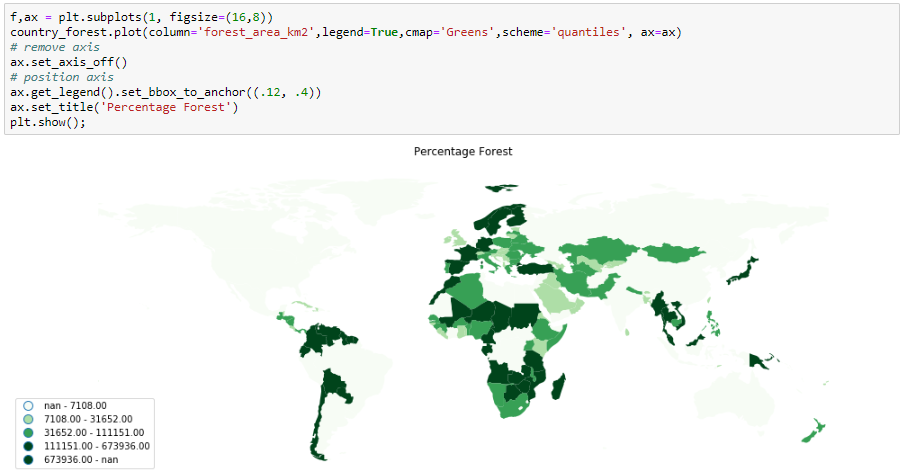